# Redes neurais convolucionais para detecção de gatos e cachorros

nesse código, vamos criar uma inteligencia artificial para conferir se dentro de uma imagem tem um gato ou um cachorro, e após isso vamos classificar uma única foto que se você tiver, pode ser do seu próprio pet

## Importação das bibliotecas e montagem do drive

aqui abaixo vamos importar pacotes de códigos, que vão criar e treinar a nossa IA e como atividades extras, há pacotes de gráficos para avaliar o andamento do classificador

In [ ]:
#importando bibliotecas
#gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#analise e tratamento de imagens e dados
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#manipulação da base de dados para atender aos requisitos do tensorflow
import zipfile
import os
#rede neural convolucional
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

abaixo estamos colocando os arquivos do nosso drive dentro do notebook do colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extração de imagens

In [ ]:
caminho = '/content/drive/MyDrive/estudo de visao computacional/Datasets/cat_dog_2.zip'
zipado = zipfile.ZipFile(file = caminho, mode = 'r')
zipado.extractall('./')
zipado.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/estudo de visao computacional/Datasets/cat_dog_2.zip' mode='r'>>

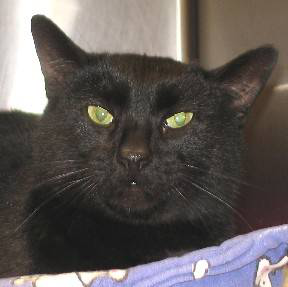

In [ ]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1016.jpg')

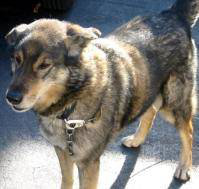

In [ ]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.1022.jpg')

## Gerando base de treino

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.4,
                                         shear_range = 0.2
                                         )

In [ ]:
base_treino = gerador_treinamento.flow_from_directory('/content/cat_dog_2/training_set',
                                                      target_size=(64,64),
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      shuffle=True)

Found 4000 images belonging to 2 classes.


In [ ]:
base_treino.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
base_treino.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## Gerando base de testes

In [ ]:
gerador_testes = ImageDataGenerator(rescale=1./255)
base_teste = gerador_testes.flow_from_directory('/content/cat_dog_2/test_set',
                                                target_size=(64,64),
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False)

Found 1000 images belonging to 2 classes.


In [ ]:
base_teste.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Criação da rede neural

In [ ]:
rede = Sequential()
#camadas convolução
rede.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu',input_shape=(64,64,3)))
rede.add(MaxPool2D(pool_size=(2,2)))
rede.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
rede.add(MaxPool2D(pool_size=(2,2)))
rede.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
rede.add(MaxPool2D(pool_size=(2,2)))
#camada de flatten
rede.add(Flatten())
#camadas densa
rede.add(Dense(units=577, activation='relu'))
rede.add(Dense(units=577, activation='relu'))
rede.add(Dense(units=2, activation='softmax'))

In [ ]:
rede.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)        

In [ ]:
#compilando
rede.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

## Treinamento e avaliação

In [ ]:
historico = rede.fit(base_treino, epochs=20)

Epoch 1/20
200/200 [==============================] - 28s 133ms/step - loss: 0.6928 - accuracy: 0.5142
Epoch 2/20
200/200 [==============================] - 29s 143ms/step - loss: 0.6873 - accuracy: 0.5372
Epoch 3/20
200/200 [==============================] - 27s 132ms/step - loss: 0.6812 - accuracy: 0.5580
Epoch 4/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6802 - accuracy: 0.5598
Epoch 5/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6754 - accuracy: 0.5763
Epoch 6/20
200/200 [==============================] - 26s 131ms/step - loss: 0.6621 - accuracy: 0.5957
Epoch 7/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6520 - accuracy: 0.6150
Epoch 8/20
200/200 [==============================] - 27s 132ms/step - loss: 0.6382 - accuracy: 0.6388
Epoch 9/20
200/200 [==============================] - 27s 132ms/step - loss: 0.6216 - accuracy: 0.6630
Epoch 10/20
200/200 [==============================] - 27s 134ms/step - l

avaliando se podemos treinar mais a rede neural

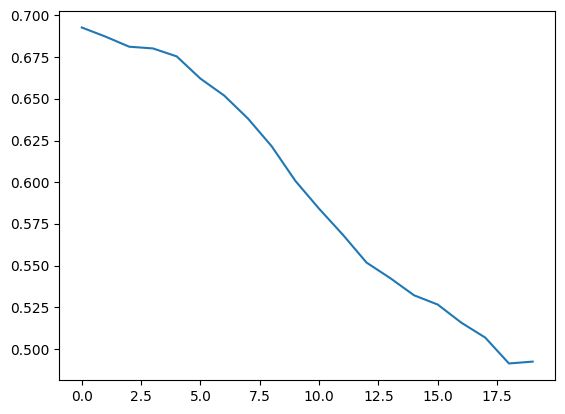

In [ ]:
plt.plot(historico.history['loss'])

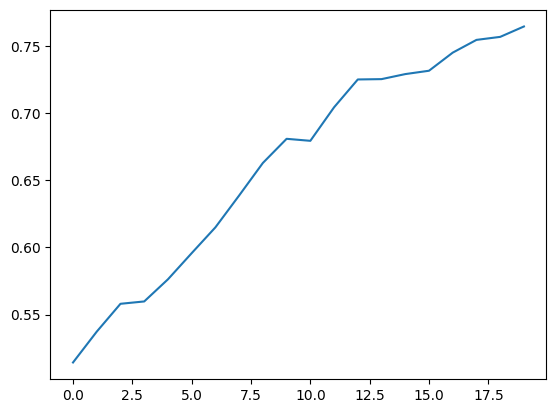

In [ ]:
plt.plot(historico.history['accuracy'])

treinando mais

In [ ]:
historico = rede.fit(base_treino, epochs=30)

Epoch 1/30
200/200 [==============================] - 31s 157ms/step - loss: 0.2397 - accuracy: 0.9035
Epoch 2/30
200/200 [==============================] - 28s 137ms/step - loss: 0.2093 - accuracy: 0.9147
Epoch 3/30
200/200 [==============================] - 28s 138ms/step - loss: 0.1939 - accuracy: 0.9170
Epoch 4/30
200/200 [==============================] - 27s 136ms/step - loss: 0.1996 - accuracy: 0.9247
Epoch 5/30
200/200 [==============================] - 27s 136ms/step - loss: 0.2054 - accuracy: 0.9143
Epoch 6/30
200/200 [==============================] - 28s 141ms/step - loss: 0.2043 - accuracy: 0.9153
Epoch 7/30
200/200 [==============================] - 29s 143ms/step - loss: 0.1935 - accuracy: 0.9235
Epoch 8/30
200/200 [==============================] - 28s 141ms/step - loss: 0.1999 - accuracy: 0.9172
Epoch 9/30
200/200 [==============================] - 28s 138ms/step - loss: 0.1773 - accuracy: 0.9320
Epoch 10/30
200/200 [==============================] - 28s 138ms/step - l

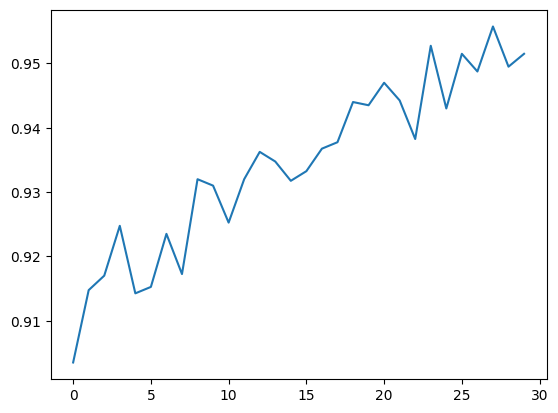

In [ ]:
plt.plot(historico.history['accuracy'])

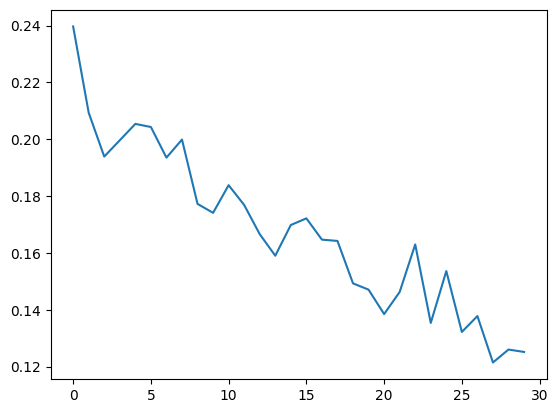

In [ ]:
plt.plot(historico.history['loss'])

Avaliando a rede

In [ ]:
previsoes = rede.predict(base_teste)
previsoes

1000/1000 [==============================] - 7s 7ms/step


array([[9.9116689e-01, 8.8330908e-03],
       [3.7486288e-01, 6.2513709e-01],
       [2.6223198e-02, 9.7377682e-01],
       ...,
       [9.7524666e-05, 9.9990249e-01],
       [2.3415107e-02, 9.7658485e-01],
       [6.4205045e-07, 9.9999940e-01]], dtype=float32)

In [ ]:
#conseguindo as respostas
previsoes = np.argmax(previsoes, axis=1)
previsoes

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [ ]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#pct de acurácia
from sklearn.metrics import accuracy_score
accuracy_score(base_teste.classes, previsoes)

0.755

<Axes: >

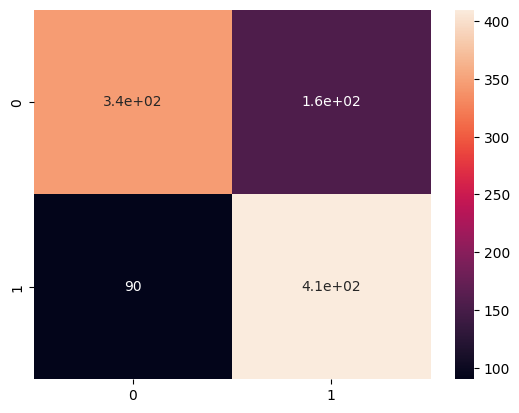

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(base_teste.classes, previsoes)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(base_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       500
           1       0.73      0.82      0.77       500

    accuracy                           0.76      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.76      0.75      1000



## Salvando e carregando a rede neural

In [ ]:
#salvando arquitetura da rede
arquitetura = rede.to_json()
with open('arquitetura_rede_caes_gatos.json', 'w') as arquivo:
  arquivo.write(arquitetura)

In [ ]:
#salvando pesos
from keras.models import save_model
rede_salva = save_model(rede, '/content/pesos_rede_caes_gatos.hdf5')

carregando rede

In [ ]:
#carregando a estrutura
with open('/content/arquitetura_rede_caes_gatos.json', 'r') as arquivo:
  arquitetura_carregada = arquivo.read()

In [ ]:
#criando a rede e atribuindo a arquitetura
rede_carregada = tf.keras.models.model_from_json(arquitetura_carregada)
#recuperando pesos
rede_carregada.load_weights('/content/pesos_rede_caes_gatos.hdf5')
#compilando a rede
rede_carregada.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rede_carregada.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)        